*The report must be prepared individually. You can use the Internet to research the questions, but do not use your findings verbatim; paraphrase them instead. Do not share or copy your report - in case of a suspicion of plagiarism you will lose your points from this report.*

Adam Wilczyński index: 156065

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math

In [52]:
class Problem:
    ### to solve a problem using Evolutionary Algorithms, we must define four methods
    
    def random_solution(self):
        # this method returns a random solution for a given problem
        # ...we need it to create the initial population!
        return []
    
    def evaluate(self, s):
        # this method returns the quality of a given solution s
        # ...we need it to decide which solutions should participate in creating the new population!
        return 0.0
    
    def mutate(self, s):
        # this method returns a slightly modified solution s
        # ...this is one of the evolutionary operators!
        return s[:]
    
    def crossover(self, s1, s2):
        # this method returns a solution that is a combination of its parent solutions - s1 and s2
        # ...this is one of the evolutionary operators!
        return s1[:]
    
    ### additionally, we should define a method that will give us a preview of any given solution s
    def display_solution_param(self, s):
        print(s)

In [53]:
class TSP(Problem):
    cities = 0
    distances = []
    locations = []
    
    def __init__(self, cities: int, city_coords=None, seed=1234):
        # we draw random locations for the cities and we prepare a matrix of distances between them - it will come useful later!
        
        random.seed(seed)
        self.cities = cities
        
        self.locations = []
        if city_coords is None:
            for i in range(cities):
                self.locations.append((random.random(), random.random()))
        else:
            for i in range(cities):
                self.locations.append(city_coords[i])
        
        self.distances = []
        for i in range(cities):
            self.distances.append([])
            for j in range(cities):
                self.distances[i].append(self.distance(i, j))
                
    def distance(self, c1, c2):
        # euclidean distance between two points on a map
        
        loc1, loc2 = self.locations[c1], self.locations[c2]
        return math.sqrt((loc1[0]-loc2[0])**2 + (loc1[1]-loc2[1])**2)
    
    def random_solution(self) -> list:
        # we return a random permutation of numbers, which corresponds to a random order of visiting cities
        
        s = [i for i in range(self.cities)]
        random.shuffle(s)
        return s
    
    def evaluate(self, s) -> float:
        # length of the route is equal to the sum of distances between all subsequent cities
        # notice that we include the distance between the first and the last city as well! the route is a loop!
        
        fit = 0
        for i in range(len(s)):
            first = i
            second = i+1 if i+1<len(s) else 0
            first_city_distances = self.distances[s[first]]
            fit += first_city_distances[s[second]]
        return fit
    
    def mutate(self, s) -> list:
        # to mutate a solution, we reverse a random subsequence of the solution
        # the route is a loop, so we need to handle the subsequences that cross the end of the array in a special way!

        sol = s[:]
        c1, c2 = random.sample(range(0, self.cities), 2)

        if c1 < c2:
            rev = sol[c1:c2+1]
            rev.reverse()
            sol[c1:c2+1] = rev
        else:
            rev = sol[c1:] + sol[:c2+1]
            rev.reverse()
            sol[:(c2+1)] = rev[-(c2+1):]
            sol[c1:] = rev[:-(c2+1)]
        assert len(s) == len(sol)
        return sol
    
    def crossover(self, s1, s2) -> tuple:
        # to combine two different routes, we use OX (order crossover)
        
        sol1, sol2 = s1[:], s2[:]
        c1, c2 = sorted(random.sample(range(0, self.cities), 2))
        sol1[c1:c2+1] = list(filter(lambda x: x in sol1[c1:c2+1], s2))
        sol2[c1:c2+1] = list(filter(lambda x: x in sol2[c1:c2+1], s1))
        assert len(sol1) == len(sol2) == len(s1) == len(s2)
        return sol1, sol2
    
    def display_solution(self, solution):
        fig, ax = plt.subplots(figsize=(8, 8))

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)
            
        plt.xlim((-0.03,1.03))
        plt.ylim((-0.03,1.03))
        plt.show()

In [54]:
class TSP_Poland(TSP):

    def dist(self, x1, y1, x2, y2):
        return ((x1-x2)**2+(y1-y2)**2)**(1/2)

    def __init__(self, seed=1234):
        city_names = ["Poznan", "Wroclaw", "Krakow", "Warszawa", "Gdansk", "Katowice", "Lodz",
                       "Bialystok", "Rzeszow", "Szczecin", "Lublin", "Olsztyn", "Kielce", "Gdynia", "Bydgoszcz", "Zakopane"]
        city_coords = {
            "Poznan": (52.409538, 16.931992),
            "Wroclaw": (51.107883, 17.038538),
            "Krakow": (50.049683, 19.944544),
            "Warszawa": (52.237049, 21.017532),
            "Gdansk": (54.372158, 18.638306),
            "Katowice": (50.270908, 19.039993),
            "Lodz": (51.759445, 19.457216),
            "Bialystok": (53.13333, 23.16433),
            "Rzeszow": (50.041187, 21.999121),
            "Szczecin": (53.42894, 14.55302),
            "Lublin": (51.25, 22.56667),
            "Olsztyn": (53.77995, 20.49416),
            "Kielce": (50.87033, 20.62752),
            "Gdynia": (54.51889, 18.53188),
            "Bydgoszcz": (53.1235, 18.00762),
            "Zakopane": (49.29899, 19.94885)
        }      
        super().__init__(len(city_names), [city_coords[city] for city in city_names], seed)
    
    ### DISPLAY (you don't have to read it) ###

    def force_aspect(self, ax, aspect=1):
        im = ax.get_images()
        extent =  im[0].get_extent()
        ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)
        
        
    def display_solution(self, solution):
        self.display_solution_param(solution, True, [11.328361, 27.045778], [49.0025, 54.835778])
        
    def display_solution_param(self, solution, show_map, xlim, ylim):
        fig, ax = plt.subplots(figsize=(8, 8))
        
        if show_map:
            datafile = 'polska.png'
            img = mpimg.imread(datafile)
            plt.imshow(img, zorder=0, extent=[14.245, 24.129139, 49.0025, 54.835778])

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)

        if show_map:
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            self.force_aspect(ax)
            
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.show()

**Task 1:** Generate a random route for the TSP_Poland problem (class: TSP_Poland). Present the solution (*display_solution()*) and its length (*evaluate()*) for that route and three possible mutations of that route. Repeat that for a new instance of the problem (a new object of the same class). Did the routes change? Why / why not?

The route will change if and only if the seed is set (seed is not None).

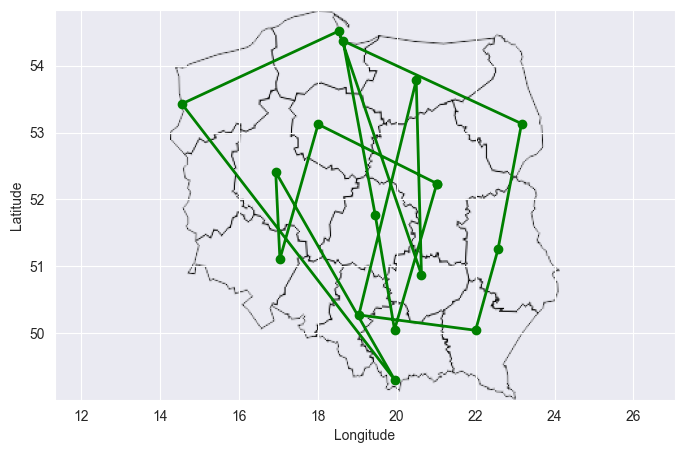

Route Length 50.77663510399158


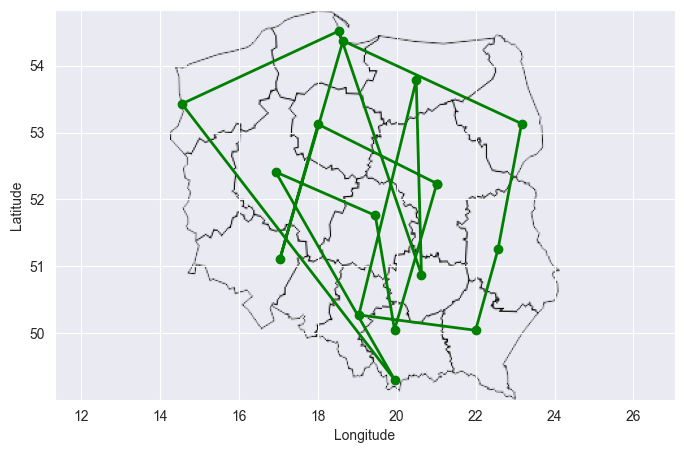

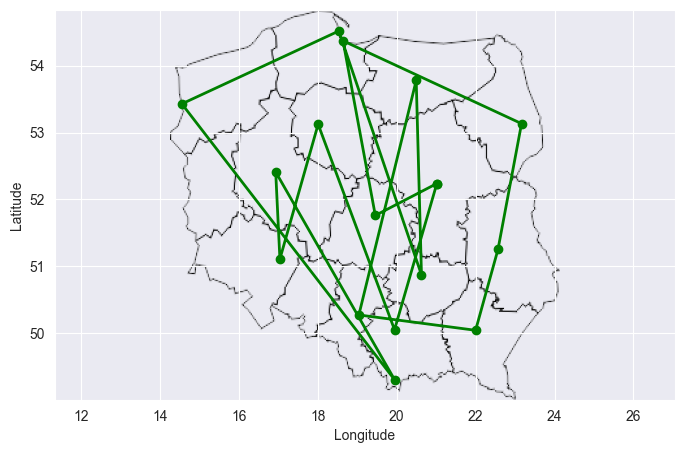

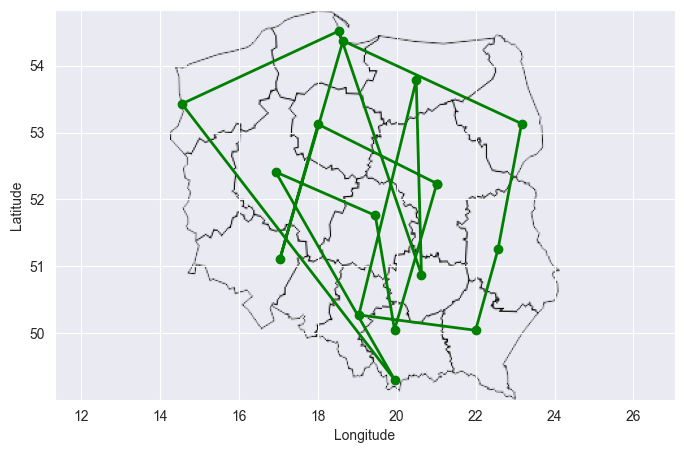

In [65]:
tsp_poland = TSP_Poland() # TODO
solution = tsp_poland.random_solution()
tsp_poland.display_solution(solution)
print("Route Length", tsp_poland.evaluate(solution))
for _ in range(3):
    mutation = tsp_poland.mutate(solution)
    tsp_poland.display_solution(mutation)

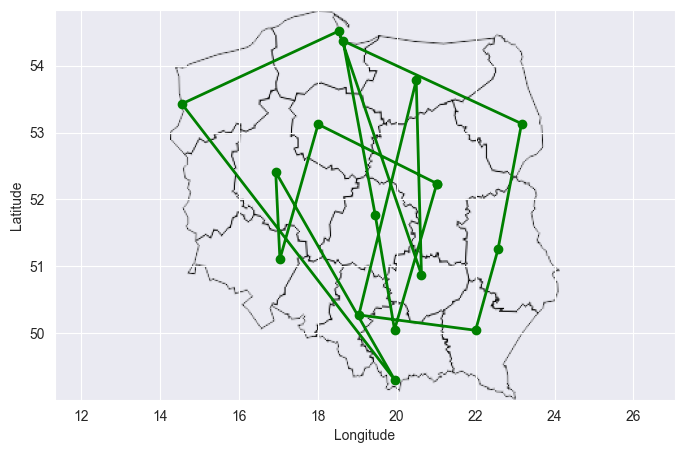

Route Length 50.77663510399158


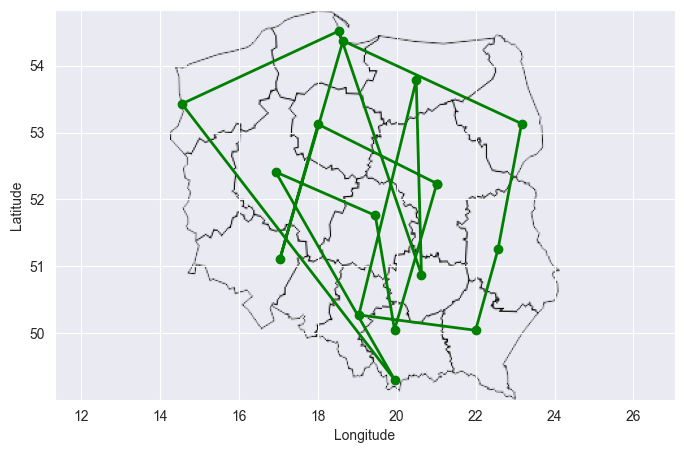

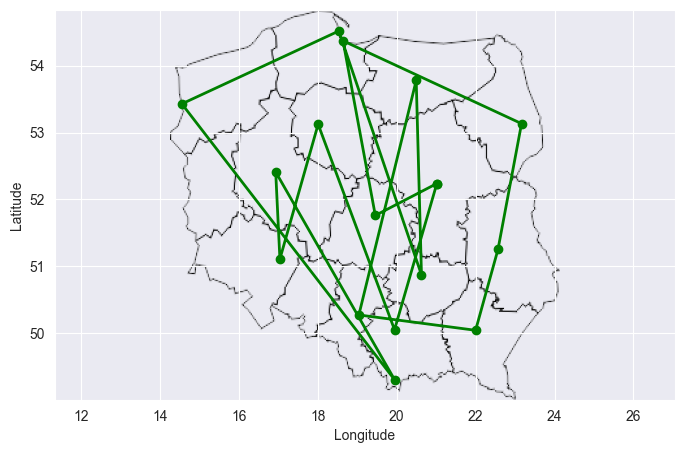

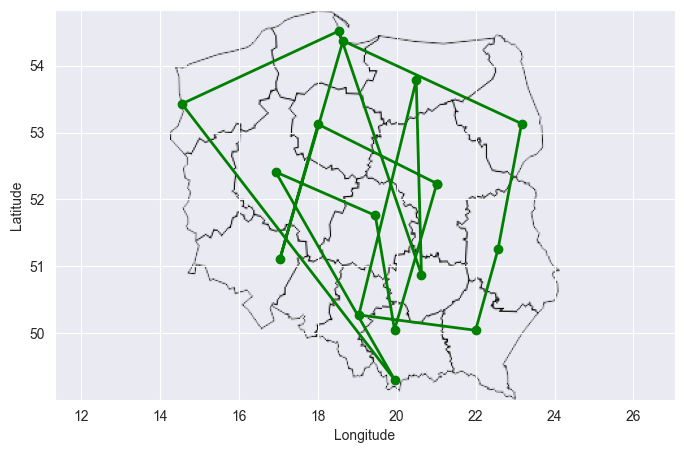

In [67]:
tsp_poland = TSP_Poland()
solution = tsp_poland.random_solution()
tsp_poland.display_solution(solution)
print("Route Length", tsp_poland.evaluate(solution))
for _ in range(3):
    mutation = tsp_poland.mutate(solution)
    tsp_poland.display_solution(mutation)

**Task 2:** Implement an algorithm searching for the best solution by generating random solutions. Write down the average fitness of the best solution after 10, 100, 1000 and 10 000 evaluated solutions over 10 runs of the algorithm.

In [56]:
import statistics

def mean_from_n_runs(n):
    def decorator(f):
        def wrapper(*args, **kwargs):
            return statistics.mean(f(*args, **kwargs) for _ in range(n))
        return wrapper
    return decorator


def random_solutions_minimum_distance(solutions_to_evaluate):
    return min(tsp_poland.evaluate(tsp_poland.random_solution()) for _ in range(solutions_to_evaluate))

evaluated_solutions_number_list = [10 ** i for i in range(1, 5)]
evaluation_10_times_mean_evolution = mean_from_n_runs(10)(random_solutions_minimum_distance)
for evaluated_solutions_number in evaluated_solutions_number_list:
    print(evaluated_solutions_number, evaluation_10_times_mean_evolution(evaluated_solutions_number))

10 48.24877957174699
100 44.7733436415817
1000 40.61322164055586
10000 37.563454507911025


**Task 3:** Implement a steady-state evolutionary algorithm with tournament selection and random deletion. Let it be parametrized with four parameters: the size of the population $N$, the size of the tournament $t$, the probability of mutation $p_m$ and the probability of crossover $p_c$. The algorithm should terminate after testing a given number of solutions, or (if the number of solutions to be tested is not given) after 1000 evaluations without improvement.

* Assume $N=20$, $t=3$, $p_m=0.6$ and $p_c=0.2$. For the TSP_Poland problem, write down the average fitness of the best solution after 10, 100, 1000 and 10 000 evaluated solutions over 10 runs of the algorithm. Does the algorithm find better solutions than random search?
* What is the difference between random search and evolution?

In [57]:
def evolutionary_algorithm(tsp: TSP, population_size, tournament_size, mutation_probability, crossover_probability, solutions_to_test=None):
    assert tournament_size >= 2, "Lower tournament size makes it impossible to perform a crossover."

    if solutions_to_test is None:
        evaluations_without_improvement_threshold = 0
        solutions_to_test = float("inf")
    else:
        evaluations_without_improvement_threshold = float("-inf")

    population = [tsp.random_solution() for _ in range(population_size)]
    population_evaluation = [tsp.evaluate(solution) for solution in population]
    minimum_evaluation = min(population_evaluation)

    while solutions_to_test > 0:


        solution_index_for_tournament_list = random.sample(range(population_size), k=tournament_size)
        # tournament_winner_index_pair = sorted(solution_index_for_tournament_list, key=lambda i: tsp_poland.evaluate(population[i]))[:2]
        tournament_winner_index_pair = sorted(solution_index_for_tournament_list, key=lambda i: tsp.evaluate(population[i]))[:2]
        tournament_winner_solution_pair = [population[i] for i in tournament_winner_index_pair]

        if random.random() <= crossover_probability:
            tournament_winner_solution_pair = tsp.crossover(*tournament_winner_solution_pair)
            if random.random() <= mutation_probability:
                tournament_winner_solution_pair = [tsp.mutate(s) for s in tournament_winner_solution_pair]

            random_deletion_index_list = random.sample(range(population_size), k=2)
            for crossover_index, i in enumerate(random_deletion_index_list):
                population[i] = tournament_winner_solution_pair[crossover_index]

        population_evaluation = [tsp.evaluate(solution) for solution in population]
        if min(population_evaluation) < minimum_evaluation:
            minimum_evaluation = min(population_evaluation)
        else:
            evaluations_without_improvement_threshold += 1



        if evaluations_without_improvement_threshold >= 1_000:
            break

        solutions_to_test -= 1

    return minimum_evaluation

evaluated_solutions_number_list = [10 ** i for i in range(1, 5)]
evaluation_10_times_mean_evolution = mean_from_n_runs(10)(evolutionary_algorithm)
for evaluated_solutions_number in evaluated_solutions_number_list:
    print(evaluated_solutions_number, evaluation_10_times_mean_evolution(tsp_poland, 20, 3, 0.6, 0.2))

10 38.01135992227281
100 37.29588356951525
1000 38.3129165979411
10000 39.105722745379246


For both random search and the evolution algorithm, we don't know if the best solution found by the algorithm is the best one that exists.
Evolution however enables us to move toward better solutions by keeping the best ones discovered and using them to create new ones.

**Task 4:** Perform some experiments using different instance sizes (10, 50, 200 and 500 cities) for the TSP problem (class: TSP). Use $N=50$, $t=3$, $p_m=0.8$ and $p_c=0.2$ as the default parameters and change values of only one parameter at a time. How do the parameters of the algorithm influence the quality of the solutions found by the algorithm? How do they influence the total number of evaluations made before the algorithm halts? Are the optimal parameter values the same for small and big instances of the TSP problem? Why / why not?

In [58]:
for cities_number in (10, 50, 200, 500):
    print(cities_number, evaluation_10_times_mean_evolution(TSP(cities_number), 20, 20, 0.7, 1))

10 3.0035041355146217
50 9.888355259806403
200 49.12630207937714
500 148.365354857141


**Task 5:**

Answer the questions in your own words:

1. What is the role of a mutation operator in evolutionary algorithms?
* What are the properties of a good mutation operator?
* What is the role of a crossover operator in evolutionary algorithms?
* What are the properties of a good crossover operator?
* What does it mean for the population to converge?
* How do the parameters of the evolutionary algorithm affect the speed of its convergence?
* Does the speed of the algorithm's convergence correlate with the quality of the solutions? What is the reason?
* Can a population escape from a local optimum once it has converged?

### What is the role of a mutation operator in evolutionary algorithms?
### What are the properties of a good mutation operator?

Good mutation provides small degree of randomness to the existing solutions.
If we have a low-cost solution, we do not want to change it to a new one generated randomly.
Instead, we randomly change some random part of our solution, only slightly affecting the evaluation of the solution.
Group of mutations will create solutions much different from the ones already in the population.
This can lead to discovery of new types of solutions, absent in the initial state of evolution.

### What is the role of a crossover operator in evolutionary algorithms?
### What are the properties of a good crossover operator?

Goal is to preserve the best genes in the population, by creating offspring of the best solutions.
New solutions combine characteristics of both of their parents which could lead to solutions better than both parents.

### What does it mean for the population to converge?

It means that the population to be consistent, homogenous - all individual solutions are similar to each other.

### What does it mean for the population to converge?

Low mutation_probability, high crossover_probability and large tournament size will lead population to converge faster.

### Does the speed of the algorithm's convergence correlate with the quality of the solutions? What is the reason?
Yes, too fast converge would mean that not many solutions where evaluated. There could be better solutions created by random mutations.

### Can a population escape from a local optimum once it has converged?

It is possible if there is a mutation which is much better than the other solution.
It could lead to create new offspring with mutation as a parent.